<h1>Password Strength Detector</h1>

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import scikitplot as skplt
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score,log_loss


In [2]:
df = pd.read_csv(r'password_data.csv')

In [3]:
df.sample(5)

,password,strength
402881,djnelly123,1
257277,munde88,0
454298,3u5veybg,1
530180,sergey1,0
263835,ocean4,0


In [4]:
df.shape

(669327, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669327 entries, 0 to 669326
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669327 non-null  object
 1   strength  669327 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [6]:
df['strength'].value_counts()

1    496747
0     89651
2     82929
Name: strength, dtype: int64

In [7]:
X=df.iloc[:,df.columns !='strength']
y=df.iloc[:,df.columns =='strength']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=101)

In [9]:
X_train.shape,X_test.shape

((501995, 1), (167332, 1))

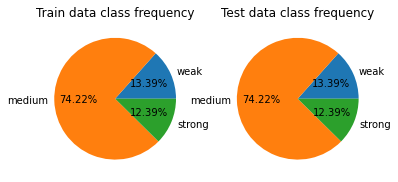

*************************************************
For training data
strength
0            67238
1           372560
2            62197
dtype: int64
****************************
For testing data
strength
0            22413
1           124187
2            20732
dtype: int64


In [10]:
freq = y_train.value_counts().sort_index().tolist()
label = ['weak','medium','strong']
plt.subplot(1, 2, 1)
plt.pie(freq, labels = label,autopct='%1.2f%%')
plt.title('Train data class frequency')

plt.subplot(1, 2, 2)
plt.pie(freq, labels = label,autopct='%1.2f%%')
plt.title('Test data class frequency')
plt.show()

print('*************************************************')
print('For training data')
print(y_train.value_counts().sort_index())
print('****************************')
print('For testing data')
print(y_test.value_counts().sort_index())

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='char',lowercase=False)
X_train = vectorizer.fit_transform(X_train.values.ravel())
X_test = vectorizer.transform(X_test.values.ravel())

In [12]:
X_train.shape,X_test.shape

((501995, 185), (167332, 185))

In [13]:
print(len(vectorizer.vocabulary_))
list(vectorizer.vocabulary_.items())[:10]

185


[('g', 86),
 ('u', 100),
 ('j', 89),
 ('a', 80),
 ('r', 97),
 ('1', 33),
 ('9', 41),
 ('6', 38),
 ('4', 36),
 ('s', 98)]

In [14]:
label = sorted(y_train['strength'].unique().tolist())

Results for Multinomial naive bayes:-

Training time(sec) =  0.12282323837280273
Prediction time(sec) =  0.015625953674316406


Training score =  0.6768883950041905
Tesing score =  0.6745439177211682


No of missclassified for class 0 (test data) = 8992 
No of missclassified for class 1 (test data) = 53830 
No of missclassified for class 2 (test data) = 2938 
Total no of missclassified points(test data) =  65760
Total % of missclassified points(test data) =  0.39299117921258336


Training log_loss =  0.7557478314890228
Tesing log_loss =  0.7558070399950942


Confusion matrix:


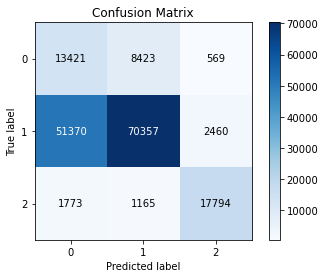



Classification report:-

              precision    recall  f1-score   support

           0       0.20      0.60      0.30     22413
           1       0.88      0.57      0.69    124187
           2       0.85      0.86      0.86     20732

    accuracy                           0.61    167332
   macro avg       0.65      0.67      0.62    167332
weighted avg       0.79      0.61      0.66    167332

**************************************************************************


In [15]:
#Fit prior is set to false since data is not balanced
mnb = MultinomialNB(fit_prior = False)

print('Results for Multinomial naive bayes:-\n')
start_time = time.time()
mnb.fit(X_train,y_train)
mnb_time = (time.time() - start_time)
print('Training time(sec) = ',mnb_time)

y_pred1 = mnb.predict(X_train)

start_time = time.time()
y_pred = mnb.predict(X_test)
mnb_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',mnb_time2)

y_pred_prob1 = mnb.predict_proba(X_train)
y_pred_prob = mnb.predict_proba(X_test)

cm_mnb = confusion_matrix(y_test, y_pred)
mnb_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_mnb = balanced_accuracy_score(y_train,y_pred1)
acc2_mnb = balanced_accuracy_score(y_test,y_pred)
loss1_mnb = log_loss(y_train,y_pred_prob1)
loss2_mnb = log_loss(y_test,y_pred_prob)

print('\n\nTraining score = ',acc1_mnb)
print('Tesing score = ',acc2_mnb)
print('\n')

for i in range(len(y_train['strength'].unique())):
    err = np.sum(cm_mnb[i])-cm_mnb[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',mnb_miss)
print('Total % of missclassified points(test data) = ',mnb_miss/len(y_test))

print('\n\nTraining log_loss = ',loss1_mnb)
print('Tesing log_loss = ',loss2_mnb)
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

MNB = [acc1_mnb,acc2_mnb,mnb_miss,mnb_miss/len(y_test),loss1_mnb,loss2_mnb,mnb_time,mnb_time2]

Results for Logistic regression:-

Training time(sec) =  25.69300413131714
Prediction time(sec) =  0.018002748489379883


Training score =  0.8609076129067633
Tesing score =  0.8594808690417564


No of missclassified for class 0 (test data) = 3670 
No of missclassified for class 1 (test data) = 27195 
No of missclassified for class 2 (test data) = 805 
Total no of missclassified points(test data) =  31670
Total % of missclassified points(test data) =  0.18926445629048838


Training log_loss =  0.47318962743204324
Tesing log_loss =  0.4740763720967338


Confusion matrix:


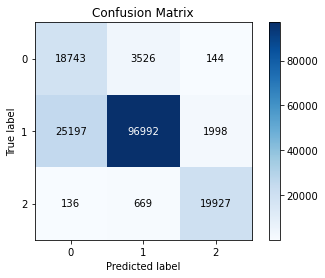



Classification report:-

              precision    recall  f1-score   support

           0       0.43      0.84      0.56     22413
           1       0.96      0.78      0.86    124187
           2       0.90      0.96      0.93     20732

    accuracy                           0.81    167332
   macro avg       0.76      0.86      0.79    167332
weighted avg       0.88      0.81      0.83    167332

**************************************************************************


In [16]:
lr=LogisticRegression(class_weight='balanced',n_jobs=-1)

print('Results for Logistic regression:-\n')
start_time = time.time()
lr.fit(X_train,y_train)
lr_time = (time.time() - start_time)
print('Training time(sec) = ',lr_time)

y_pred1 = lr.predict(X_train)

start_time = time.time()
y_pred = lr.predict(X_test)
lr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lr_time2)

y_pred_prob1 =lr.predict_proba(X_train)
y_pred_prob=lr.predict_proba(X_test)

cm_lr = confusion_matrix(y_test, y_pred)
lr_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lr = balanced_accuracy_score(y_train,y_pred1)
acc2_lr = balanced_accuracy_score(y_test,y_pred)
loss1_lr = log_loss(y_train,y_pred_prob1)
loss2_lr = log_loss(y_test,y_pred_prob)

print('\n\nTraining score = ',acc1_lr)
print('Tesing score = ',acc2_lr)
print('\n')

for i in range(len(y_train['strength'].unique())):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
    
print('Total no of missclassified points(test data) = ',lr_miss)
print('Total % of missclassified points(test data) = ',lr_miss/len(y_test))
print('\n\nTraining log_loss = ',loss1_lr)
print('Tesing log_loss = ',loss2_lr)
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

LR = [acc1_lr,acc2_lr,lr_miss,lr_miss/len(y_test),loss1_lr,loss2_lr,lr_time,lr_time2]

In [17]:
s1=[MNB,LR]
s2=['MNB','LR']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

In [18]:
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})

In [19]:
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,MNB,0.676888,0.674544,65760,0.392991,0.755748,0.755807,0.122823,0.015626
1,LR,0.860908,0.859481,31670,0.189264,0.473190,0.474076,25.693004,0.018003


In [20]:
df = pd.read_csv(r'password_data2.csv')
df.sample(5)

,length,count_spc,num_len,uppercase,lowercase,strength
419968,16,0,1,8,7,2
645770,8,0,4,0,4,1
542031,10,0,3,0,7,1
642789,10,0,8,0,2,1
5415,6,0,2,0,4,0


In [21]:
df.shape

(669327, 6)

In [22]:
X=df.iloc[:,df.columns !='strength']
y=df.iloc[:,df.columns =='strength']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=101)

In [24]:
X_train.shape,X_test.shape

((501995, 5), (167332, 5))

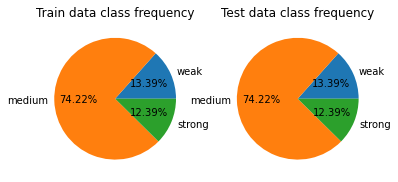

*************************************************
For training data
strength
0            67238
1           372560
2            62197
dtype: int64
****************************
For testing data
strength
0            22413
1           124187
2            20732
dtype: int64


In [25]:
freq = y_train.value_counts().sort_index().tolist()
label = ['weak','medium','strong']
plt.subplot(1, 2, 1)
plt.pie(freq, labels = label,autopct='%1.2f%%')
plt.title('Train data class frequency')

plt.subplot(1, 2, 2)
plt.pie(freq, labels = label,autopct='%1.2f%%')
plt.title('Test data class frequency')
plt.show()

print('*************************************************')
print('For training data')
print(y_train.value_counts().sort_index())
print('****************************')
print('For testing data')
print(y_test.value_counts().sort_index())

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test.values)

Results for Logistic regression:-

Training time(sec) =  17.115137338638306
Prediction time(sec) =  0.01586174964904785


Training score =  0.9999219405499039
Tesing score =  0.9999043846766305


No of missclassified for class weak (test data) = 3 
No of missclassified for class medium (test data) = 19 
No of missclassified for class strong (test data) = 0 
Total no of missclassified points(test data) =  22
Total % of missclassified points(test data) =  0.00013147515119642388


Training log_loss =  0.0015813761840901886
Tesing log_loss =  0.0019369177087940137


Confusion matrix:


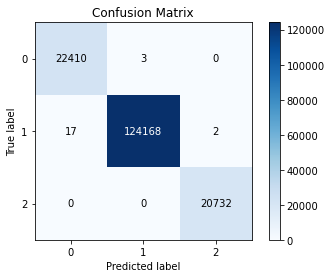



Classification report:-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22413
           1       1.00      1.00      1.00    124187
           2       1.00      1.00      1.00     20732

    accuracy                           1.00    167332
   macro avg       1.00      1.00      1.00    167332
weighted avg       1.00      1.00      1.00    167332

**************************************************************************


In [28]:
lr=LogisticRegression(class_weight='balanced',n_jobs=-1)

print('Results for Logistic regression:-\n')
start_time = time.time()
lr.fit(X_train,y_train)
lr_time = (time.time() - start_time)
print('Training time(sec) = ',lr_time)

y_pred1 = lr.predict(X_train)

start_time = time.time()
y_pred = lr.predict(X_test)
lr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lr_time2)

y_pred_prob1 =lr.predict_proba(X_train)
y_pred_prob=lr.predict_proba(X_test)

cm_lr = confusion_matrix(y_test, y_pred)
lr_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lr = balanced_accuracy_score(y_train,y_pred1)
acc2_lr = balanced_accuracy_score(y_test,y_pred)
loss1_lr = log_loss(y_train,y_pred_prob1)
loss2_lr = log_loss(y_test,y_pred_prob)

print('\n\nTraining score = ',acc1_lr)
print('Tesing score = ',acc2_lr)
print('\n')

for i in range(len(y_train['strength'].unique())):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
    
print('Total no of missclassified points(test data) = ',lr_miss)
print('Total % of missclassified points(test data) = ',lr_miss/len(y_test))
print('\n\nTraining log_loss = ',loss1_lr)
print('Tesing log_loss = ',loss2_lr)
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

LR = [acc1_lr,acc2_lr,lr_miss,lr_miss/len(y_test),loss1_lr,loss2_lr,lr_time,lr_time2]

In [29]:
cls = np.unique(y_train).tolist()
col=np.append(X.columns,['Constant'])
plane=pd.DataFrame(index=col)
for i in range(len(cls)):
    lr_coeff=np.append(lr.coef_[i],lr.intercept_[i]).T
    plane['Plane_'+str(i)] = lr_coeff
plane

,Plane_0,Plane_1,Plane_2
length,-23.097909,1.566307,21.531602
count_spc,-1.063881,-0.012094,1.075975
num_len,-7.858827,1.066104,6.792723
uppercase,-8.006664,0.370608,7.636056
lowercase,-8.496075,0.828151,7.667924
Constant,-9.429547,22.013250,-12.583703


Results for Extra-tree classifier:-

Training time(sec) =  8.117275476455688
Prediction time(sec) =  0.5653674602508545


Training score =  0.9999457601969333
Tesing score =  0.9999070688008409


No of missclassified for class weak (test data) = 3 
No of missclassified for class medium (test data) = 18 
No of missclassified for class strong (test data) = 0 
Total no of missclassified points(test data) =  21
Total % of missclassified points(test data) =  0.00012549900796022278


Training log_loss =  0.00023307810708196895
Tesing log_loss =  0.0009722829781451192


Confusion matrix:


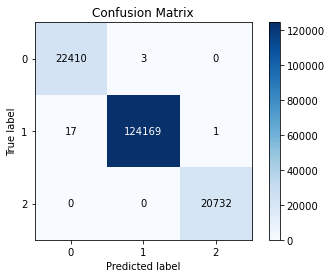



Classification report:-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22413
           1       1.00      1.00      1.00    124187
           2       1.00      1.00      1.00     20732

    accuracy                           1.00    167332
   macro avg       1.00      1.00      1.00    167332
weighted avg       1.00      1.00      1.00    167332

**************************************************************************


In [30]:
#Fit prior is set to false since data is not balanced
from sklearn.ensemble import ExtraTreesClassifier

etree = ExtraTreesClassifier(class_weight='balanced',n_jobs=-1)

print('Results for Extra-tree classifier:-\n')

start_time = time.time()
etree.fit(X_train,y_train)
etree_time = (time.time() - start_time)
print('Training time(sec) = ',etree_time)

y_pred1 = etree.predict(X_train)

start_time = time.time()
y_pred = etree.predict(X_test)
etree_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',etree_time2)

y_pred_prob1 = etree.predict_proba(X_train)
y_pred_prob = etree.predict_proba(X_test)

cm_etree = confusion_matrix(y_test, y_pred)
etree_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_etree = balanced_accuracy_score(y_train,y_pred1)
acc2_etree = balanced_accuracy_score(y_test,y_pred)
loss1_etree = log_loss(y_train,y_pred_prob1)
loss2_etree = log_loss(y_test,y_pred_prob)

print('\n\nTraining score = ',acc1_etree)
print('Tesing score = ',acc2_etree)
print('\n')

for i in range(len(y_train['strength'].unique())):
    err = np.sum(cm_etree[i])-cm_etree[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',etree_miss)
print('Total % of missclassified points(test data) = ',etree_miss/len(y_test))

print('\n\nTraining log_loss = ',loss1_etree)
print('Tesing log_loss = ',loss2_etree)
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

Extra_tree = [acc1_etree,acc2_etree,etree_miss,etree_miss/len(y_test),loss1_etree,loss2_etree,etree_time,etree_time2]

In [31]:
s1=[LR,Extra_tree]
s2=['LR','Extra_tree']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]

In [32]:
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})

In [33]:
result2

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,LR,0.999922,0.999904,22,0.000131,0.001581,0.001937,17.115137,0.015862
1,Extra_tree,0.999946,0.999907,21,0.000125,0.000233,0.000972,8.117275,0.565367


In [34]:
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,MNB,0.676888,0.674544,65760,0.392991,0.755748,0.755807,0.122823,0.015626
1,LR,0.860908,0.859481,31670,0.189264,0.473190,0.474076,25.693004,0.018003


<h3>Feature selection<\h3>

In [35]:
def scorer(lr,X,y):
    y_pred = lr.predict(X)
    score = balanced_accuracy_score(y,y_pred)
    return score

In [19]:
efs = EFS(lr, 
           min_features=3,
           max_features=5,
           scoring=scorer,
           print_progress=True,
           cv=3 
          )

start_time = time.time()
efs = efs.fit(X_train, y_train, custom_feature_names=X.columns.tolist())
efs_time = (time.time() - start_time)
print('Training time(sec) = ',efs_time)

print('\nBest accuracy score: %.2f' ,efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

X_train_efs = efs.transform(X_train)
X_test_efs = efs.transform(X_test)

Features: 16/16

Training time(sec) =  436.0289752483368

Best accuracy score: %.2f 0.9999358448785888
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('length', 'num_len', 'uppercase')


In [34]:
df = pd.DataFrame.from_dict(efs.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)
df[['feature_names','avg_score']].head(10)

,feature_names,avg_score
3,"(length, num_len, uppercase)",0.999936
4,"(length, num_len, lowercase)",0.999936
5,"(length, uppercase, lowercase)",0.999936
0,"(length, count_spc, num_len)",0.999935
2,"(length, count_spc, lowercase)",0.999934
11,"(length, count_spc, num_len, lowercase)",0.999931
1,"(length, count_spc, uppercase)",0.999923
10,"(length, count_spc, num_len, uppercase)",0.999923
12,"(length, count_spc, uppercase, lowercase)",0.99992
15,"(length, count_spc, num_len, uppercase, lowerc...",0.999914


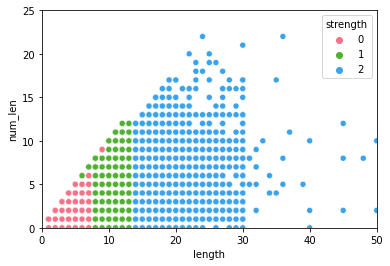

Total time(sec) =  36.796265840530396


In [40]:
start_time = time.time()
sns.scatterplot(x='length',y='num_len',hue='strength',data=df,palette=sns.color_palette("husl", 3))
plt.xlim([0,50])
plt.ylim([0,25])
plt.show()
print('Total time(sec) = ',(time.time() - start_time))

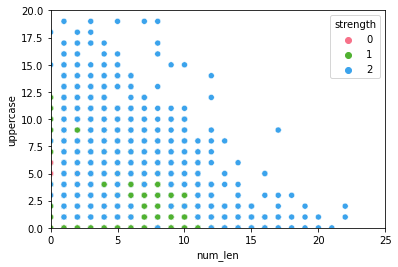

Total time(sec) =  33.011839866638184


In [43]:
start_time = time.time()
sns.scatterplot(x='num_len',y='uppercase',hue='strength',data=df,palette=sns.color_palette("husl", 3))
plt.xlim([0,25])
plt.ylim([0,20])
plt.show()
print('Total time(sec) = ',(time.time() - start_time))

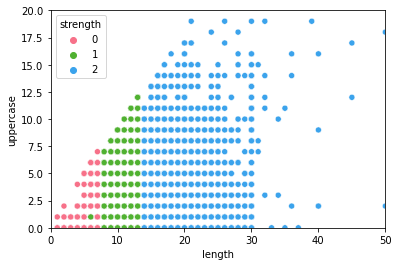

Total time(sec) =  39.700440883636475


In [44]:
start_time = time.time()
sns.scatterplot(x='length',y='uppercase',hue='strength',data=df,palette=sns.color_palette("husl", 3))
plt.xlim([0,50])
plt.ylim([0,20])
plt.show()
print('Total time(sec) = ',(time.time() - start_time))